This is a tiny example of using Stein Thinning updated to PyStan 3 from https://github.com/wilson-ye-chen/stein_thinning#installing-via-git.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

import stan
from stein_thinning.thinning import thin

In [27]:
import nest_asyncio
nest_asyncio.apply()

In [28]:
mc = """
parameters {vector[2] x;}
model {x ~ multi_normal([0, 0], [[1, 0.8], [0.8, 1]]);}
"""
sm = stan.build(mc)
fit = sm.sample(num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!


In [41]:
smpl = fit['x'].T
grad = np.apply_along_axis(lambda x: sm.grad_log_prob(x.tolist()), 1, smpl)
idx = thin(smpl, grad, 40)

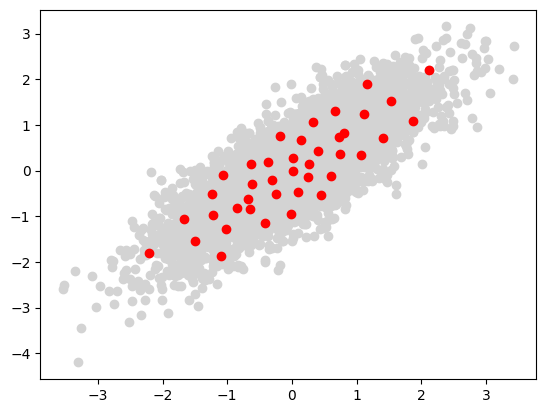

In [45]:
fig, ax = plt.subplots();
ax.scatter(smpl[:, 0], smpl[:, 1], color='lightgray');
ax.scatter(smpl[idx, 0], smpl[idx, 1], color='red');